# Imports

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import math
import tqdm

In [2]:
@dataclass
class MLP:
  d: [int]
  W: [[[float]]]
  X: [[float]]
  deltas: [[float]]

  def forward_pass(self, sample_inputs: [float], is_classification: bool):
    for j in range(1, self.d[0] + 1):
      self.X[0][j] = sample_inputs[j - 1]
    
    for l in range(1, len(self.d)):
      for j in range(1, self.d[l] + 1):
        sum_result = 0.0
        for i in range(self.d[l - 1] + 1):
          sum_result += self.W[l][i][j] * self.X[l-1][i]
        self.X[l][j] = sum_result
        if l < len(self.d) - 1 or is_classification:
          self.X[l][j] = math.tanh(self.X[l][j])

  def train_stochastic_gradient_backpropagation(self, 
                                                flattened_dataset_inputs: [float],
                                                flattened_expected_outputs: [float],
                                                is_classification: bool,
                                                alpha: float = 0.01,
                                                iterations_count: int = 1000):
    L = len(self.d) - 1
    input_dim = self.d[0]
    output_dim = self.d[L]
    samples_count = len(flattened_dataset_inputs) // input_dim
    
    for it in (range(iterations_count)):
      k = random.randint(0, samples_count - 1)
      sample_inputs = flattened_dataset_inputs[k * input_dim:(k + 1) * input_dim]
      sample_expected_outputs = flattened_expected_outputs[k * output_dim:(k + 1) * output_dim]

      self.forward_pass(sample_inputs, is_classification)

      for j in range(1, self.d[L] + 1):
        self.deltas[L][j] = (self.X[L][j] - sample_expected_outputs[j - 1])
        if is_classification :
          self.deltas[L][j] = (1 - self.X[L][j] * self.X[L][j] ) * self.deltas[L][j]

      for l in reversed(range(1, L + 1)):
        for i in range(0, self.d[l - 1] + 1):
          sum_result = 0.0
          for j in range(1, self.d[l] + 1):
            sum_result += self.W[l][i][j] * self.deltas[l][j]
          
          self.deltas[l-1][i] = (1 - self.X[l-1][i] * self.X[l-1][i]) * sum_result
      
      for l in range(1, L + 1):
        for i in range(0, self.d[l - 1] + 1):
          for j in range(1, self.d[l] + 1):
            self.W[l][i][j] += - alpha * self.X[l - 1][i] * self.deltas[l][j]



def create_mlp_model(npl: [int]):
  d = list(npl)
  W = []
  for l in range(len(d)):
    W.append([])
    if l == 0:
      continue
    
    for i in range(d[l - 1] + 1):
      W[l].append([])
      for j in range(d[l] + 1):
        W[l][i].append(random.uniform(-1.0, 1.0))
  
  X = []
  for l in range(len(d)):
    X.append([])
    for j in range(d[l] + 1):
      X[l].append(1.0 if j == 0 else 0.0)

  deltas = []  
  for l in range(len(d)):
    deltas.append([])
    for j in range(d[l] + 1):
      deltas[l].append(0.0)

  model = MLP(d, W, X, deltas)
  return model


def train_classification_stochastic_backprop_mlp_model(model: MLP, 
                                                       flattened_dataset_inputs: [float],
                                                       flattened_expected_outputs: [float],
                                                       alpha: float = 0.01,
                                                       iterations_count: int = 1000):
  model.train_stochastic_gradient_backpropagation(flattened_dataset_inputs,
                                                 flattened_expected_outputs,
                                                 True,
                                                 alpha,
                                                 iterations_count)

def train_regression_stochastic_backprop_mlp_model(model: MLP, 
                                                       flattened_dataset_inputs: [float],
                                                       flattened_expected_outputs: [float],
                                                       alpha: float = 0.01,
                                                       iterations_count: int = 1000):
  model.train_stochastic_gradient_backpropagation(flattened_dataset_inputs,
                                                 flattened_expected_outputs,
                                                 False,
                                                 alpha,
                                                 iterations_count)

def predict_mlp_model_classification(model: MLP, sample_inputs: [float]):
  model.forward_pass(sample_inputs, is_classification=True)
  return model.X[len(model.d) - 1][1:]

def predict_mlp_model_regression(model: MLP, sample_inputs: [float]):
  model.forward_pass(sample_inputs, is_classification=False)
  return model.X[len(model.d) - 1][1:]

def destroy_mlp_model():
  pass

#Implémentation modèle linéaire en pur python

---



In [3]:
def create_linear_model(input_dim: int):
  return [random.random() * 2 - 1 for i in range(input_dim + 1)]

In [4]:
def train_regression_linear_model(model, dataset_inputs: [float], dataset_expected_outputs:[float]):
  input_size =len(model) - 1
  sample_count = len(dataset_inputs) // (input_size)
  X = np.array(dataset_inputs)
  Y = np.array(dataset_expected_outputs)

  X = np.reshape(X, (sample_count, input_size))
  bias_fake_inputs = np.ones((sample_count, 1))

  X = np.hstack((bias_fake_inputs, X))
  Y = np.reshape(Y, (sample_count, 1))

  W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)

  for i in range(len(model)):
    model[i] = W[i][0]

In [5]:
def train_rosenblatt_linear_model(model, dataset_inputs: [float], dataset_expected_outputs:[float], iterations_count: int = 10, alpha: float = 0.01):
  input_size =len(model) - 1
  sample_count = len(dataset_inputs) // (input_size)

  for it in range(iterations_count):
    k = random.randint(0, sample_count - 1)
    Xk = dataset_inputs[k * input_size:(k + 1) * input_size]
    yk = dataset_expected_outputs[k * 1]
    gXk = predict_linear_model_classification(model, Xk)

    model[0] += alpha * (yk - gXk) * 1.0
    for i in range(1, len(model)):
      model[i] += alpha * (yk - gXk) * Xk[i - 1]



In [6]:
# slower but readable
# def predict_linear_model_regression(model: [float], inputs: [float]):
#   inputs_with_bias = list(inputs)
#   inputs_with_bias.insert(0, 1.0)
#   sum_rslt = 0.0
#   for i in range(len(model)):
#     sum_rslt += model[i] * inputs_with_bias[i]
#   return sum_rslt

# Better but less readable
def predict_linear_model_regression(model: [float], inputs: [float]):
  sum_rslt = model[0]
  for i in range(1, len(model)):
      sum_rslt += model[i] * inputs[i - 1]
  return sum_rslt


In [7]:
def predict_linear_model_classification(model: [float], inputs: [float]):
  pred = predict_linear_model_regression(model, inputs)
  return 1.0 if pred >= 0 else -1.0

In [8]:
def destroy_linear_model():
  pass

# Utilisation du modèle linéaire pour de la classification

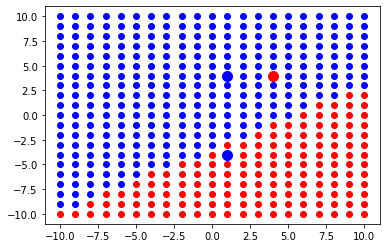

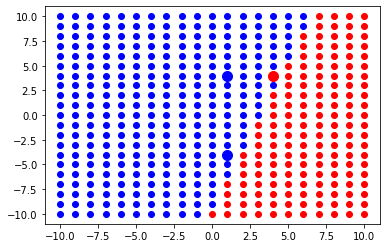

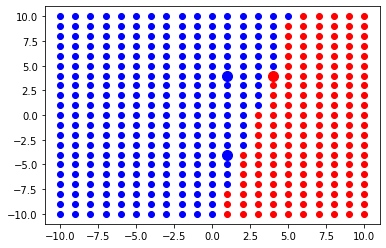

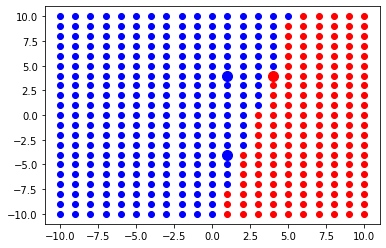

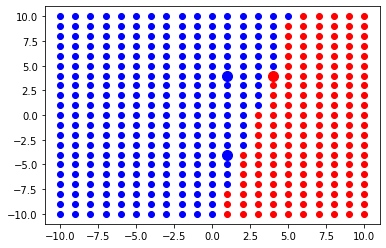

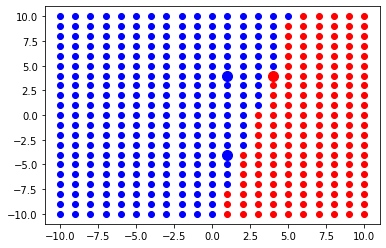

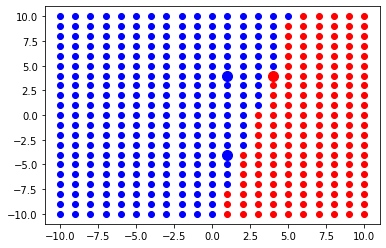

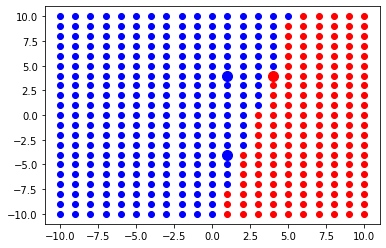

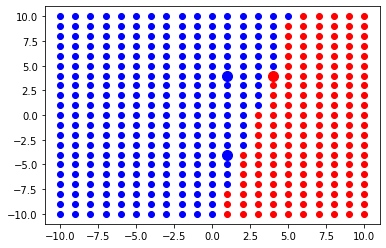

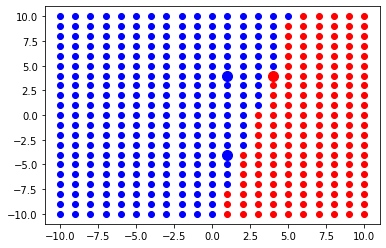

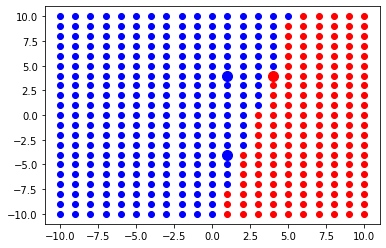

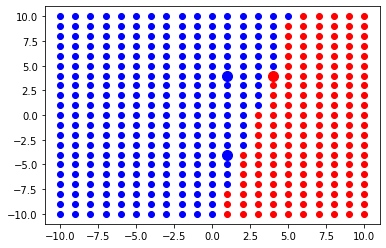

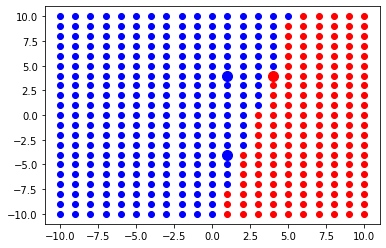

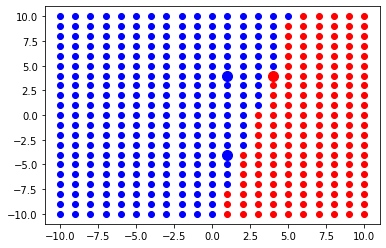

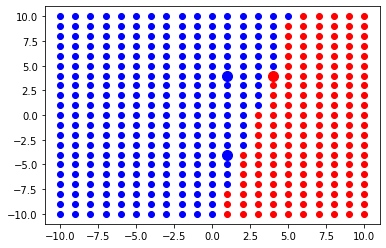

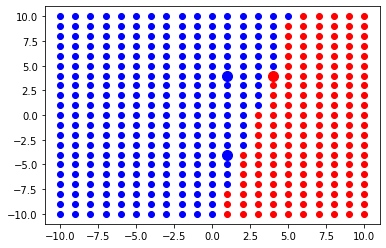

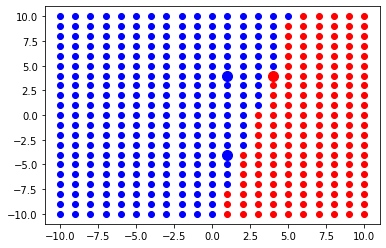

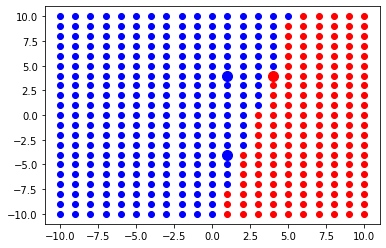

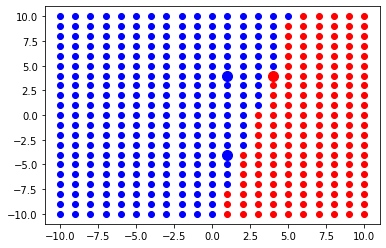

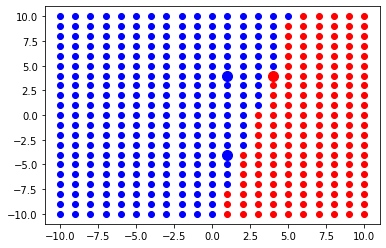

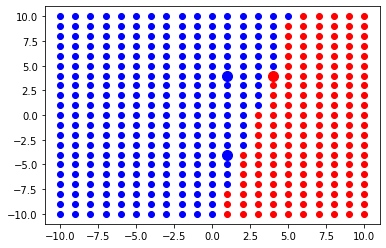

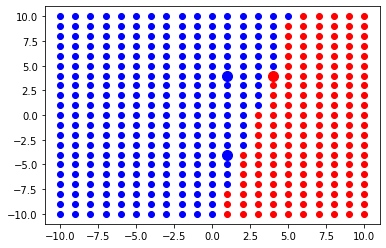

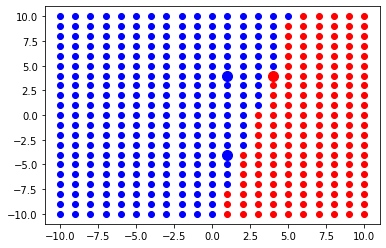

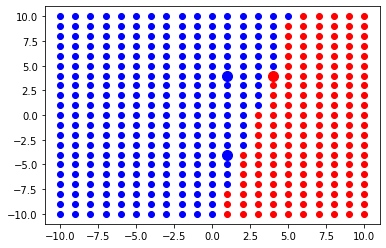

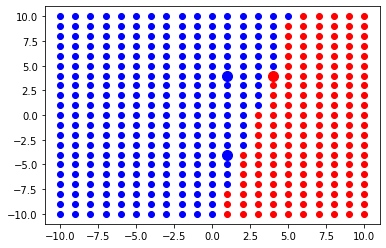

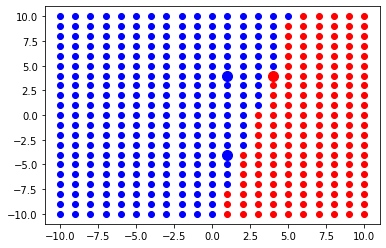

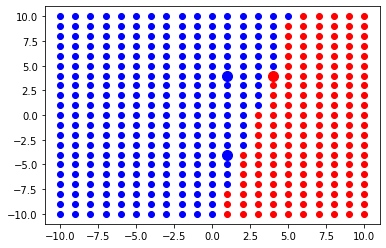

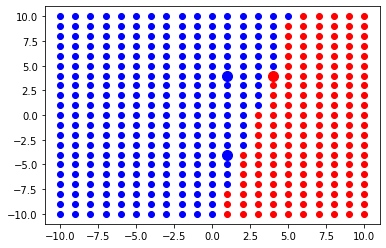

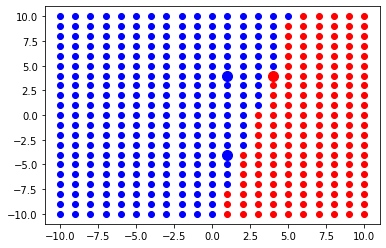

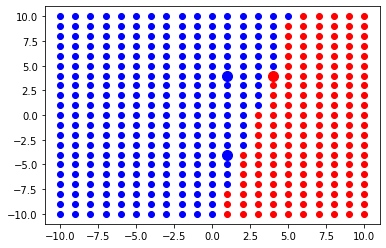

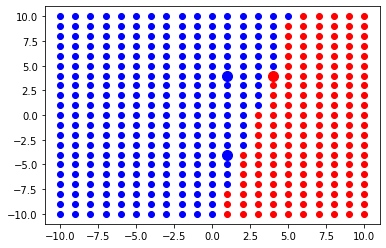

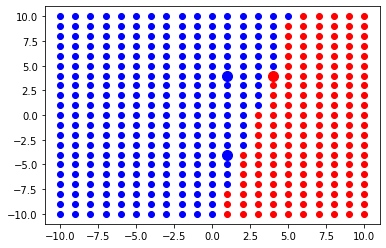

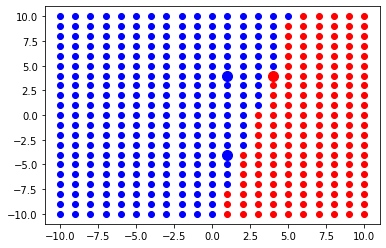

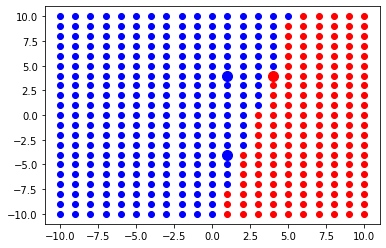

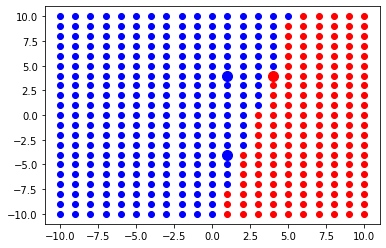

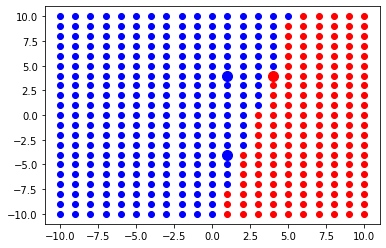

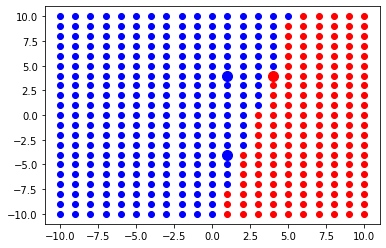

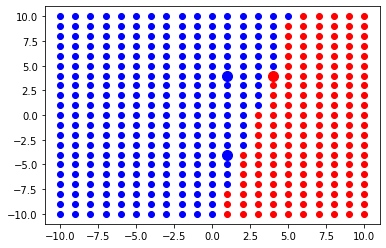

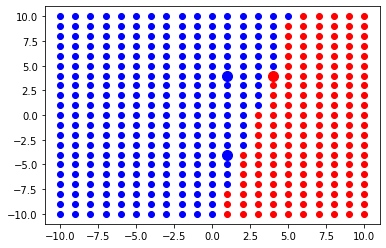

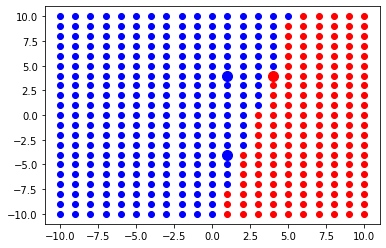

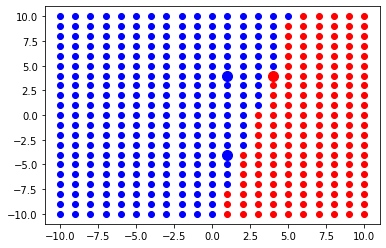

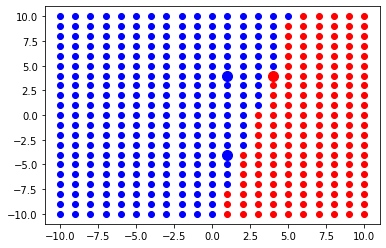

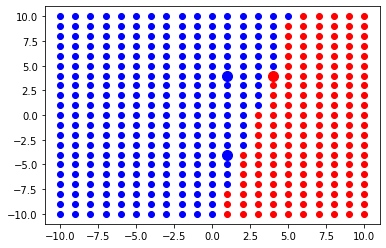

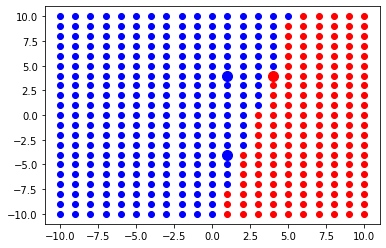

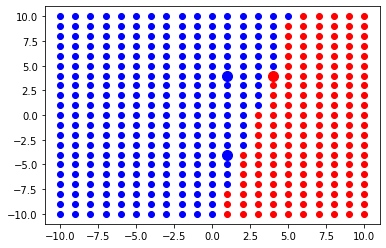

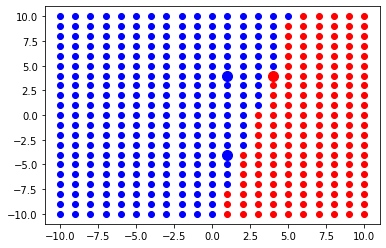

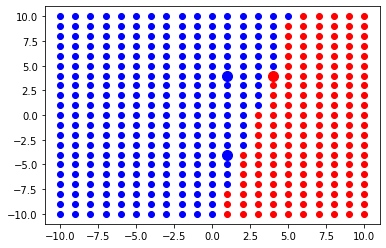

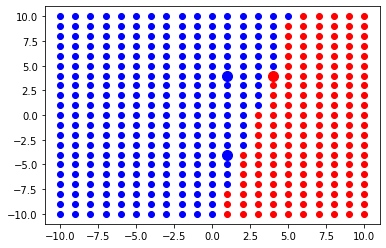

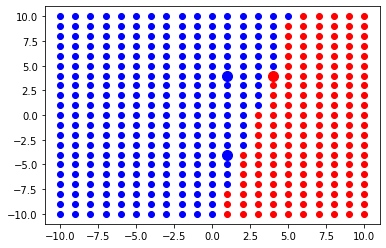

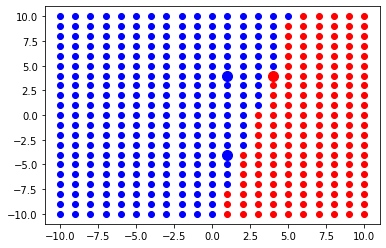

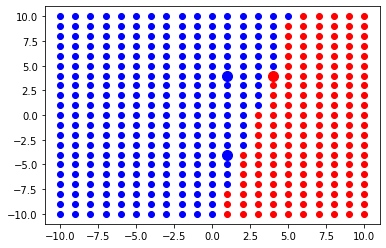

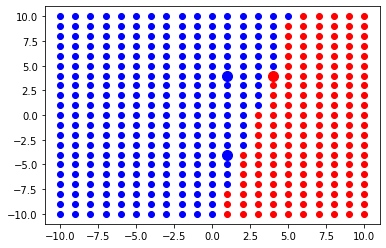

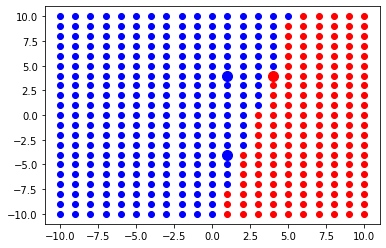

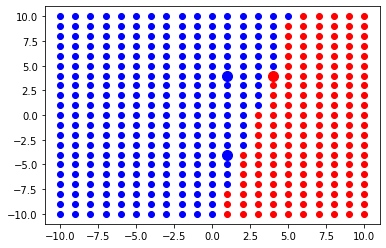

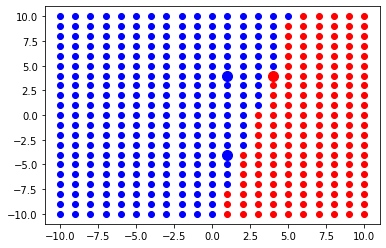

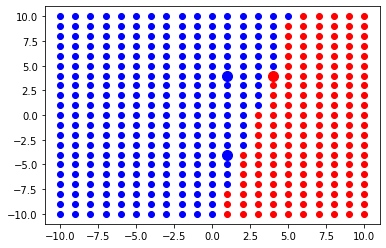

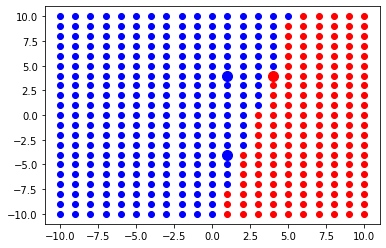

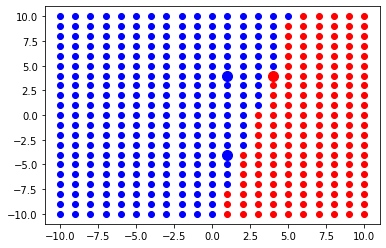

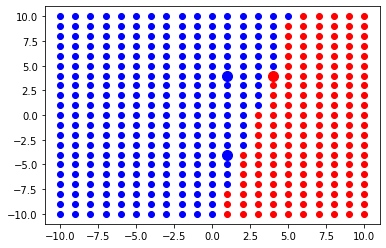

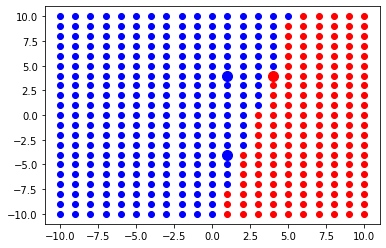

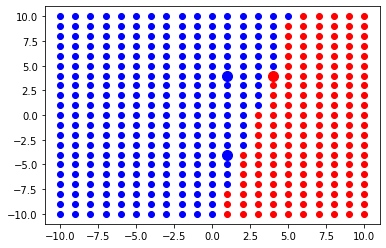

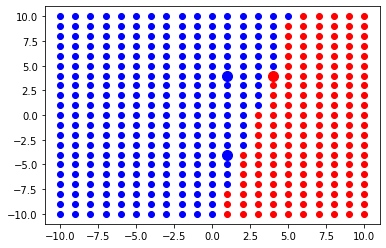

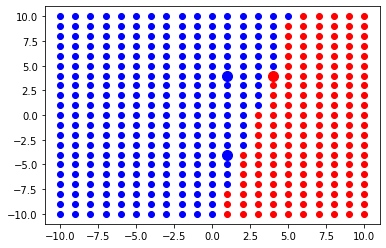

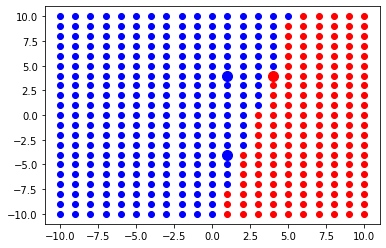

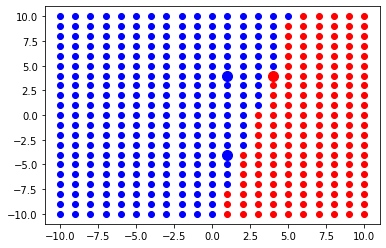

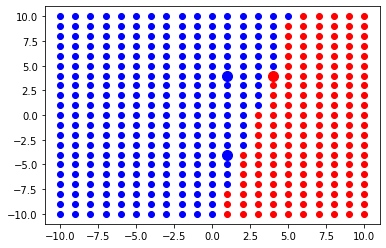

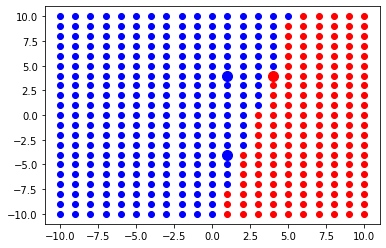

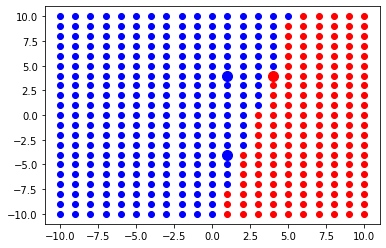

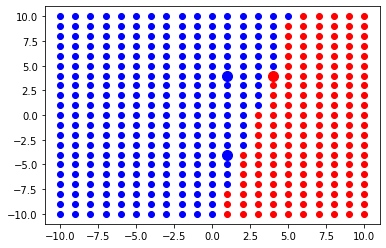

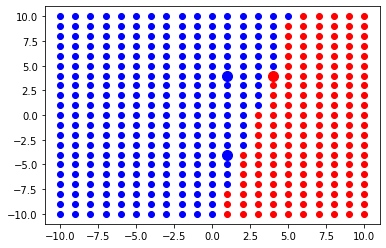

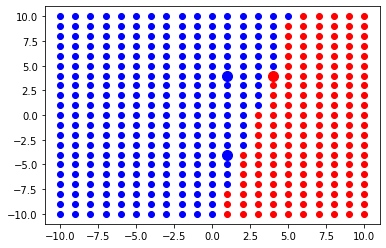

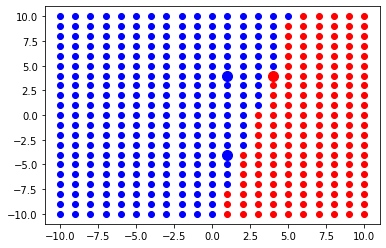

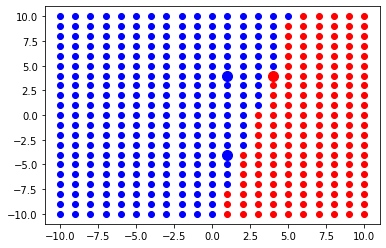

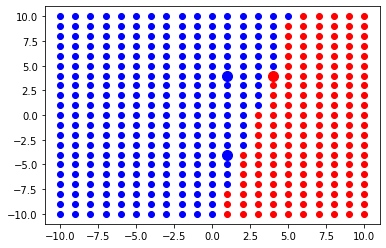

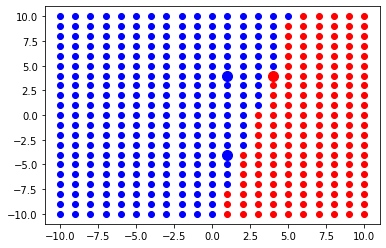

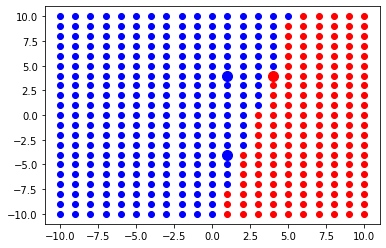

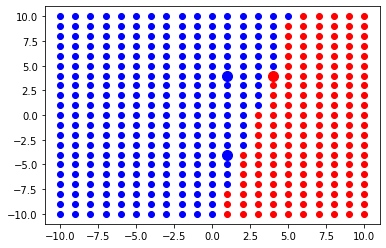

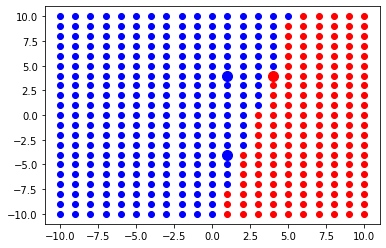

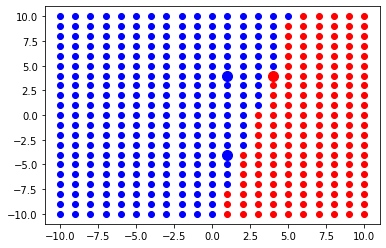

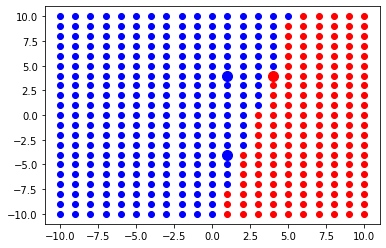

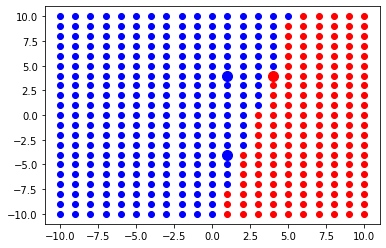

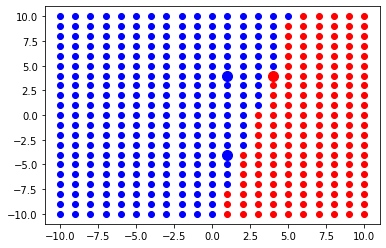

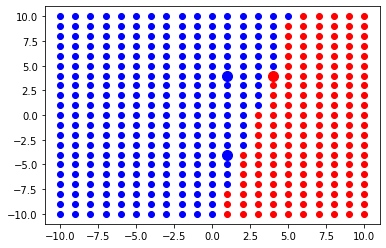

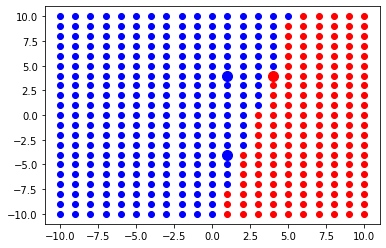

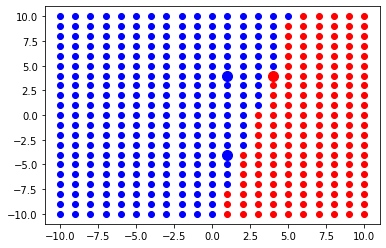

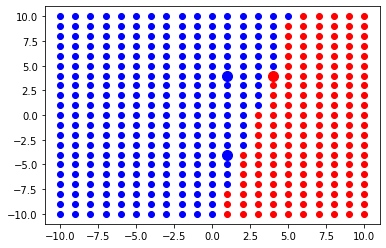

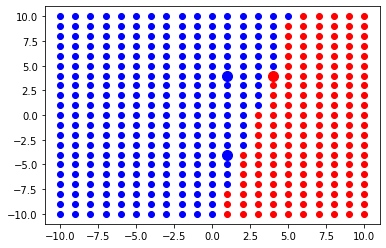

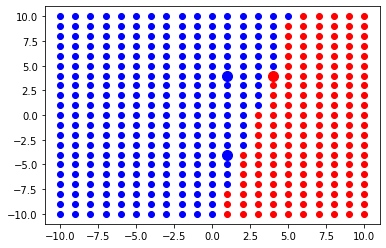

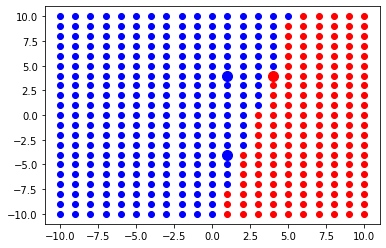

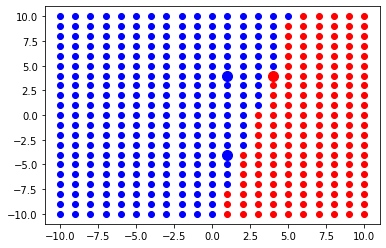

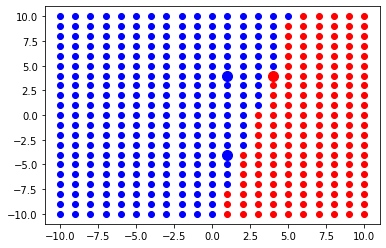

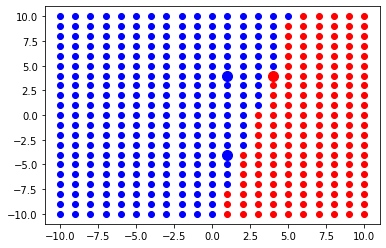

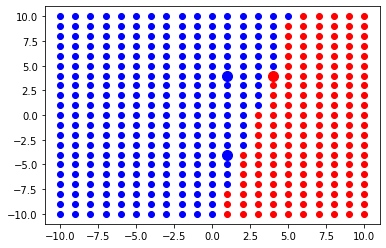

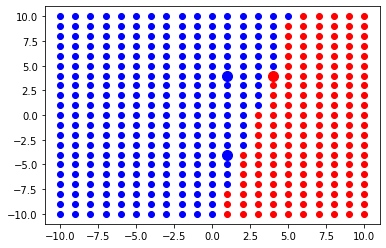

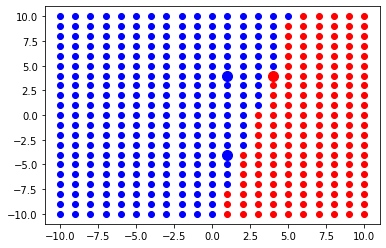

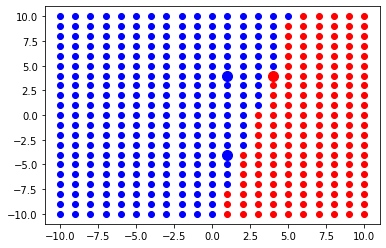

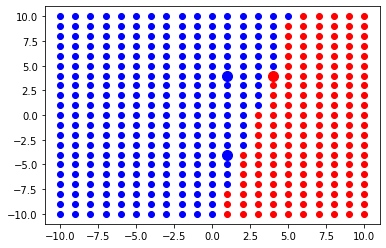

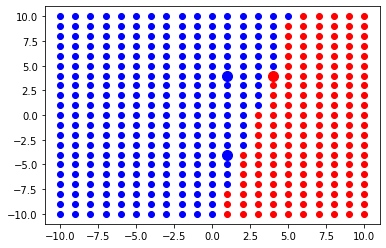

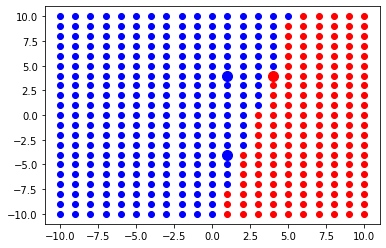

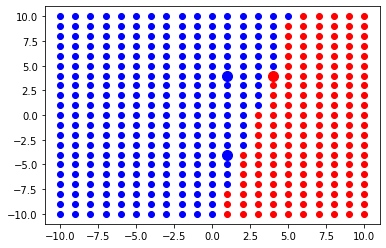

In [9]:

dataset_inputs = [
                  [1, 4],
                  [1, -4],
                  [4, 4],
]

dataset_expected_outputs = [
                  1,
                  1,
                  -1,
]

model = create_linear_model(2)

for _ in range(100):
  points_x1_blue = []
  points_x2_blue = []

  points_x1_red = []
  points_x2_red = []

  for i in range(-10, 11):
    for j in range(-10, 11):
      if predict_linear_model_classification(model, [i, j]) == 1.0:
          points_x1_blue.append(i)
          points_x2_blue.append(j)
      else:
        points_x1_red.append(i)
        points_x2_red.append(j)

  plt.scatter(points_x1_blue, points_x2_blue, c='blue')
  plt.scatter(points_x1_red, points_x2_red, c='red')

  plt.scatter([p[0] for p in dataset_inputs[:2]], [p[1] for p in dataset_inputs[:2]], c='blue', s=100)
  plt.scatter([p[0] for p in dataset_inputs[2:]], [p[1] for p in dataset_inputs[2:]], c='red', s=100)

  plt.show()

  dataset_inputs_for_train = []
  for elt in dataset_inputs:
    dataset_inputs_for_train.append(elt[0])
    dataset_inputs_for_train.append(elt[1])


  train_rosenblatt_linear_model(model, dataset_inputs_for_train, dataset_expected_outputs, iterations_count=20, alpha=0.001)

# Utilisation du modèle linéaire pour de la régression

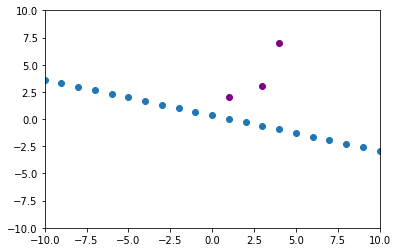

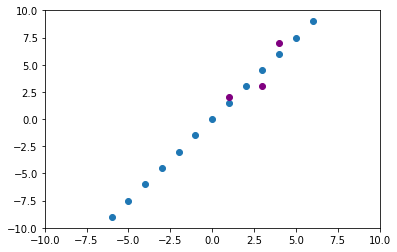

In [10]:
model = create_linear_model(1)

dataset_inputs = [
                  1,
                  3,
                  4,
]

dataset_expected_outputs = [
                  2,
                  3,
                  7
]


points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_linear_model_regression(model, [i]))

plt.scatter(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()

train_regression_linear_model(model, dataset_inputs, dataset_expected_outputs)



points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_linear_model_regression(model, [i]))

plt.scatter(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()


# Utilisation du MLP pour la classification :

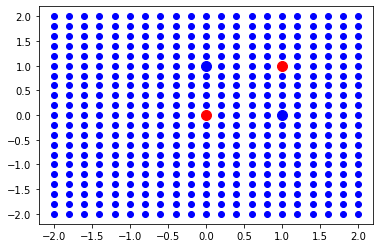

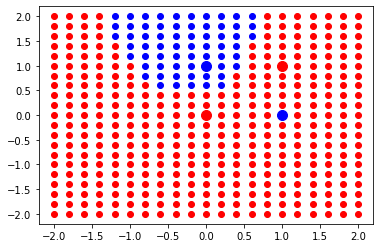

In [10]:
dataset_inputs = [
                  [0, 0],
                  [1, 1],
                  [1, 0],
                  [0, 1],
]

dataset_expected_outputs = [
                  -1,
                  -1,
                  1,
                  1,
]

model = create_mlp_model([2, 2, 1])

for _ in range(2):
  points_x1_blue = []
  points_x2_blue = []

  points_x1_red = []
  points_x2_red = []

  for i in range(-10, 11):
    for j in range(-10, 11):
      if predict_mlp_model_classification(model, [i / 5.0, j / 5.0])[0] >= 0:
          points_x1_blue.append(i / 5.0)
          points_x2_blue.append(j / 5.0)
      else:
        points_x1_red.append(i / 5.0)
        points_x2_red.append(j / 5.0)

  plt.scatter(points_x1_blue, points_x2_blue, c='blue')
  plt.scatter(points_x1_red, points_x2_red, c='red')

  plt.scatter([p[0] for p in dataset_inputs[:2]], [p[1] for p in dataset_inputs[:2]], c='red', s=100)
  plt.scatter([p[0] for p in dataset_inputs[2:]], [p[1] for p in dataset_inputs[2:]], c='blue', s=100)

  plt.show()

  dataset_inputs_for_train = []
  for elt in dataset_inputs:
    dataset_inputs_for_train.append(elt[0])
    dataset_inputs_for_train.append(elt[1])


  train_classification_stochastic_backprop_mlp_model(model, 
                                                     dataset_inputs_for_train, 
                                                     dataset_expected_outputs,
                                                     iterations_count = 100000)

# Utilisation du MLP pour de la régression :

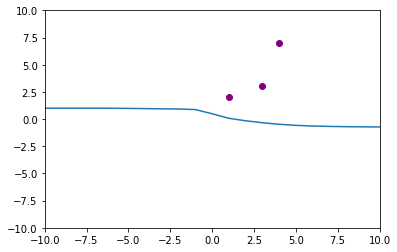

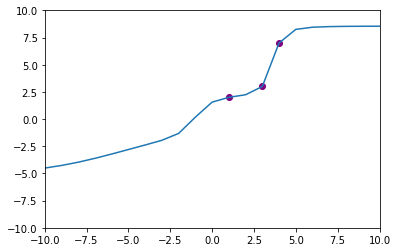

In [13]:
model = create_mlp_model([1, 5, 5, 1])

dataset_inputs = [
                  1,
                  3,
                  4,
]

dataset_expected_outputs = [
                  2,
                  3,
                  7
]


points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_mlp_model_regression(model, [i])[0])

plt.plot(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()

train_regression_stochastic_backprop_mlp_model(model, 
                                               dataset_inputs, 
                                               dataset_expected_outputs,
                                               iterations_count = 100000)



points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_mlp_model_regression(model, [i])[0])

plt.plot(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()

# Utilisation du MLP pour de la classification à 3 classes

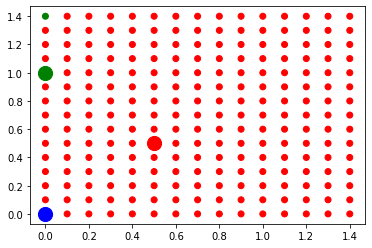

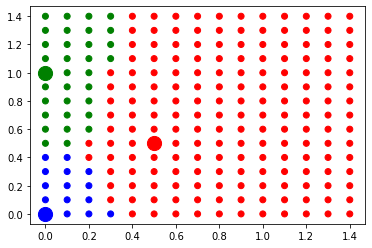

In [11]:
dataset_flattened_inputs = [
                            0, 0,
                            0.5, 0.5,
                            0, 1
]

dataset_flattened_outputs = [
                             1, -1, -1,
                             -1, 1, -1,
                             -1, -1, 1,
]

model = create_mlp_model([2, 3, 3])

points = [[i / 10.0, j / 10.0] for i in range(15) for j in range(15)]

predicted_values = [predict_mlp_model_classification(model, p) for p in points]

classes = [np.argmax(v) for v in predicted_values]

colors = ['blue' if c == 0 else ('red' if c == 1 else 'green') for c in classes]

plt.scatter([p[0] for p in points], [p[1] for p in points], c=colors)
plt.scatter(dataset_flattened_inputs[0], dataset_flattened_inputs[1], c="blue", s=200)
plt.scatter(dataset_flattened_inputs[2], dataset_flattened_inputs[3], c="red", s=200)
plt.scatter(dataset_flattened_inputs[4], dataset_flattened_inputs[5], c="green", s=200)
plt.show()

train_classification_stochastic_backprop_mlp_model(model, dataset_flattened_inputs, dataset_flattened_outputs, iterations_count=100000)
predicted_values = [predict_mlp_model_classification(model, p) for p in points]

classes = [np.argmax(v) for v in predicted_values]

colors = ['blue' if c == 0 else ('red' if c == 1 else 'green') for c in classes]

plt.scatter([p[0] for p in points], [p[1] for p in points], c=colors)
plt.scatter(dataset_flattened_inputs[0], dataset_flattened_inputs[1], c="blue", s=200)
plt.scatter(dataset_flattened_inputs[2], dataset_flattened_inputs[3], c="red", s=200)
plt.scatter(dataset_flattened_inputs[4], dataset_flattened_inputs[5], c="green", s=200)
plt.show()



# SKLearn MLP Wrapper

In [12]:
class MySKLearnMLPRawWrapper:
  def __init__(self, npl: [int], classification: bool = True, 
               alpha: float = 0.01, iteration_count: int = 1000):
    self.model = create_mlp_model(npl)
    self.classification = classification
    self.alpha = alpha
    self.iteration_count = iteration_count

  def fit(self, X, Y):
    if not hasattr(X, 'shape'):
      X = np.array(X)    
    
    if not hasattr(Y, 'shape'):
      Y = np.array(Y)

    if len(X.shape) == 1:
      X = np.expand_dims(X, axis=0)
    
    if len(Y.shape) == 1:
      Y = np.expand_dims(Y, axis=0)

    if self.classification:
      train_classification_stochastic_backprop_mlp_model(self.model, X.flatten(), 
                                                         Y.flatten(), self.alpha, self.iteration_count)
    else:
      train_regression_stochastic_backprop_mlp_model(self.model, X.flatten(), 
                                                         Y.flatten(), self.alpha, self.iteration_count)


  def predict(self, X):
    if not hasattr(X, 'shape'):
      X = np.array(X)

    results = []
    if len(X.shape) == 1:
      X = np.expand_dims(X, axis=0)

    for x in X:
      if self.classification:
        results.append(predict_mlp_model_classification(self.model, x.flatten()))
      else:
        results.append(predict_mlp_model_regression(self.model, x.flatten()))

    return np.array(results)

# Show Loss curves on random dataset

In [15]:
X_random = np.random.uniform(-1, 1.0, (100, 2))
Y_random = np.random.uniform(-1, 1.0, (100, 1))

val_X_random = np.random.uniform(-1, 1.0, (10, 2))
val_Y_random = np.random.uniform(-1, 1.0, (10, 1))

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

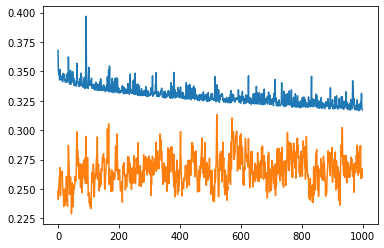

In [17]:
losses = []
val_losses = []
wrapped_model = MySKLearnMLPRawWrapper([2, 3, 1], iteration_count=len(X_random))
for epoch in range(1000):
  wrapped_model.fit(X_random, Y_random)
  loss = mean_squared_error(Y_random, wrapped_model.predict(X_random))
  losses.append(loss)
  val_loss = mean_squared_error(val_Y_random, wrapped_model.predict(val_X_random))
  val_losses.append(val_loss)

plt.plot(losses)
plt.plot(val_losses)
plt.show()

# Show Loss and Accuracy on MNIST Digits dataset

In [19]:
import tensorflow as tf
from IPython.display import clear_output
from PIL.Image import fromarray

In [20]:
target_size = (8, 8)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_images = [fromarray(arr, 'L').resize(target_size) for arr in x_train]
test_images = [fromarray(arr, 'L').resize(target_size) for arr in x_test]

x_train = np.array([np.array(im) for im in train_images])
x_test = np.array([np.array(im) for im in test_images])


x_train = x_train / 127.5 - 1.0
x_test = x_test / 127.5 - 1.0

x_train = x_train[:6000]
y_train = y_train[:6000]
x_test = x_test[:1000]
y_test = y_test[:1000]

y_train = tf.keras.utils.to_categorical(y_train, 10) * 2 - 1
y_test = tf.keras.utils.to_categorical(y_test, 10) * 2 - 1

Epoch : 21


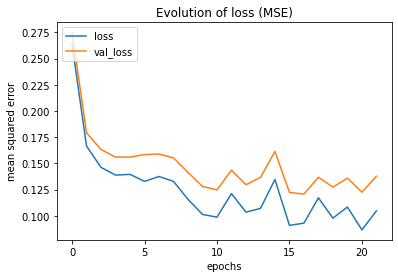

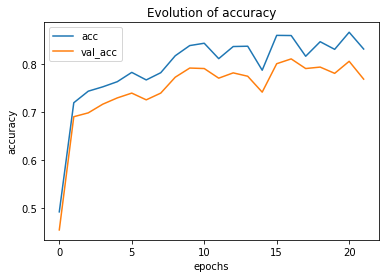

KeyboardInterrupt: 

In [21]:
losses = []
val_losses = []
accs = []
val_accs = []
wrapped_model = MySKLearnMLPRawWrapper([target_size[0] * target_size[1], 8, 8, 10], iteration_count=len(x_train))
for epoch in range(100):
  wrapped_model.fit(x_train, y_train)

  predicted_y_train = wrapped_model.predict(x_train)
  predicted_y_test = wrapped_model.predict(x_test)

  loss = mean_squared_error(y_train, predicted_y_train)
  losses.append(loss)
  val_loss = mean_squared_error(y_test, predicted_y_test)
  val_losses.append(val_loss)
  
  acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(predicted_y_train, axis=1))
  accs.append(acc)
  val_acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predicted_y_test, axis=1))
  val_accs.append(val_acc)

  clear_output()

  print(f'Epoch : {epoch}')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss', 'val_loss'], loc='upper left')
  plt.title('Evolution of loss (MSE)')
  plt.xlabel('epochs')
  plt.ylabel(f'mean squared error')
  plt.show()
  
  plt.plot(accs)
  plt.plot(val_accs)
  plt.legend(['acc', 'val_acc'], loc='upper left')
  plt.title('Evolution of accuracy')
  plt.xlabel('epochs')
  plt.ylabel(f'accuracy')
  plt.show()

# Affichage de la matrice de confusion

In [22]:
  predicted_y_test = wrapped_model.predict(x_test)
  confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predicted_y_test, axis=1))

array([[ 78,   0,   3,   0,   0,   2,   1,   1,   0,   0],
       [  0, 118,   0,   3,   1,   1,   2,   1,   0,   0],
       [  8,   7,  90,   3,   1,   0,   2,   2,   3,   0],
       [  0,   1,   3,  77,   1,  19,   1,   3,   1,   1],
       [  0,   0,   1,   0,  89,   1,   2,   2,   0,  15],
       [  1,   4,   0,   3,   1,  65,   4,   2,   4,   3],
       [  3,   0,   1,   0,   3,   2,  78,   0,   0,   0],
       [  0,   5,   3,   0,   0,   0,   0,  84,   1,   6],
       [  1,   0,   1,   3,   2,  10,   4,   2,  62,   4],
       [  0,   0,   0,   1,   2,   3,   0,   5,   2,  81]], dtype=int64)

# Eli5 et Permutation Importance

In [24]:
!pip install eli5

In [25]:
from eli5.sklearn import PermutationImportance

In [26]:
permutation_importance_model = PermutationImportance(wrapped_model, scoring='neg_mean_squared_error')

In [27]:
permutation_importance_model.fit(x_test.reshape((-1, target_size[0] * target_size[1])), y_test)

PermutationImportance(estimator=<__main__.MySKLearnMLPRawWrapper object at 0x000001B6696F33D0>,
                      scoring='neg_mean_squared_error')

In [28]:
import eli5

In [29]:
eli5.show_weights(permutation_importance_model)

Weight,Feature
0.0576 ± 0.0039,x43
0.0563 ± 0.0077,x26
0.0463 ± 0.0076,x27
0.0426 ± 0.0022,x45
0.0380 ± 0.0075,x34
0.0363 ± 0.0048,x20
0.0297 ± 0.0033,x28
0.0290 ± 0.0029,x36
0.0289 ± 0.0026,x19
0.0255 ± 0.0076,x42


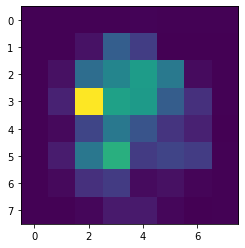

In [207]:
plt.imshow(np.reshape(permutation_importance_model.feature_importances_, (8, 8)))
plt.show()

# _

In [18]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.5 MB/s 


In [19]:
import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [63]:
class MLPEstimator():
  def __init__(self, model):
    self.model = model

  def fit(self, X, Y):
    if not hasattr(X, 'shape'):
      X = np.array(X)
    if not hasattr(Y, 'shape'):
      Y = np.array(Y)
    dataset_flattened_inputs = X.flatten()
    dataset_flattened_outputs = Y.flatten()
    train_classification_stochastic_backprop_mlp_model(self.model, dataset_flattened_inputs, dataset_flattened_outputs, iterations_count=100000)

  def predict(self, X):
    if not hasattr(X, 'shape'):
      X = np.array(X)
    rslt = []
    if len(X.shape) == 1:
      rslt.append(np.argmax(predict_mlp_model_classification(self.model, X)))
    elif len(X.shape) > 1:
      rslt = []
      for x in X:
        rslt.append(np.argmax(predict_mlp_model_classification(self.model, x.flatten())))
    return np.array(rslt)

  def __del__:
    
    


In [64]:
myEstimator = MLPEstimator(model)

In [65]:
myEstimator.predict(np.array([5, 0]))

array([1])

In [66]:
perm = eli5.sklearn.PermutationImportance(myEstimator, scoring='accuracy')

In [67]:
fit = perm.fit(points, classes)

In [68]:
eli5.show_weights(perm)

Weight,Feature
0.3636 ± 0.0451,x0
0.1502 ± 0.0300,x1


In [69]:
perm.feature_importances_

array([0.36355556, 0.15022222])

In [72]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [73]:
mean_squared_error(myEstimator.predict(points), classes)

0.0

In [74]:
accuracy_score(myEstimator.predict(points), classes)

1.0